In [1]:
# Imports
import os, sys, types
import pathlib
import pickle
from importlib import reload
import numpy as np

In [2]:
from functools import partial

In [3]:
# Local package imports
# Update this with setup & develop later
PROJECT_PATH = str(pathlib.Path().resolve().parent)
sys.path.append(PROJECT_PATH)

In [4]:
import qbe

/Users/arkopal/miniconda3/envs/qbe-qiskit/lib/python3.9/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
# Cool reloading
# Reference: https://stackoverflow.com/questions/28101895/reloading-packages-and-their-submodules-recursively-in-python

def reload_package(package):
    assert(hasattr(package, "__package__"))
    fn = package.__file__
    fn_dir = os.path.dirname(fn) + os.sep
    module_visit = {fn}
    del fn

    def reload_recursive_ex(module):
        reload(module)

        for module_child in vars(module).values():
            if isinstance(module_child, types.ModuleType):
                fn_child = getattr(module_child, "__file__", None)
                if (fn_child is not None) and fn_child.startswith(fn_dir):
                    if fn_child not in module_visit:
                        # print("reloading:", fn_child, "from", module)
                        module_visit.add(fn_child)
                        reload_recursive_ex(module_child)

    return reload_recursive_ex(package)

In [15]:
# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# 1. ToyModel -- VQE (Linear Constraints + GD)

In [ ]:
# Get the results of the classical run with linear constraints


In [7]:
n_runs = 120
max_iters = 31

In [8]:
list_save_dir = 'toymodel_linear_vqe_gd_001/log_runs'

In [9]:
emp_est = qbe.utils.job_processor.EmpiricalEstimator(list_save_dir, max_iters=max_iters)

In [10]:
rmse_mean, rmse_std = emp_est.plot_rmse()

In [13]:
n_eig_calls = emp_est.job_results['neig_calls'][0]

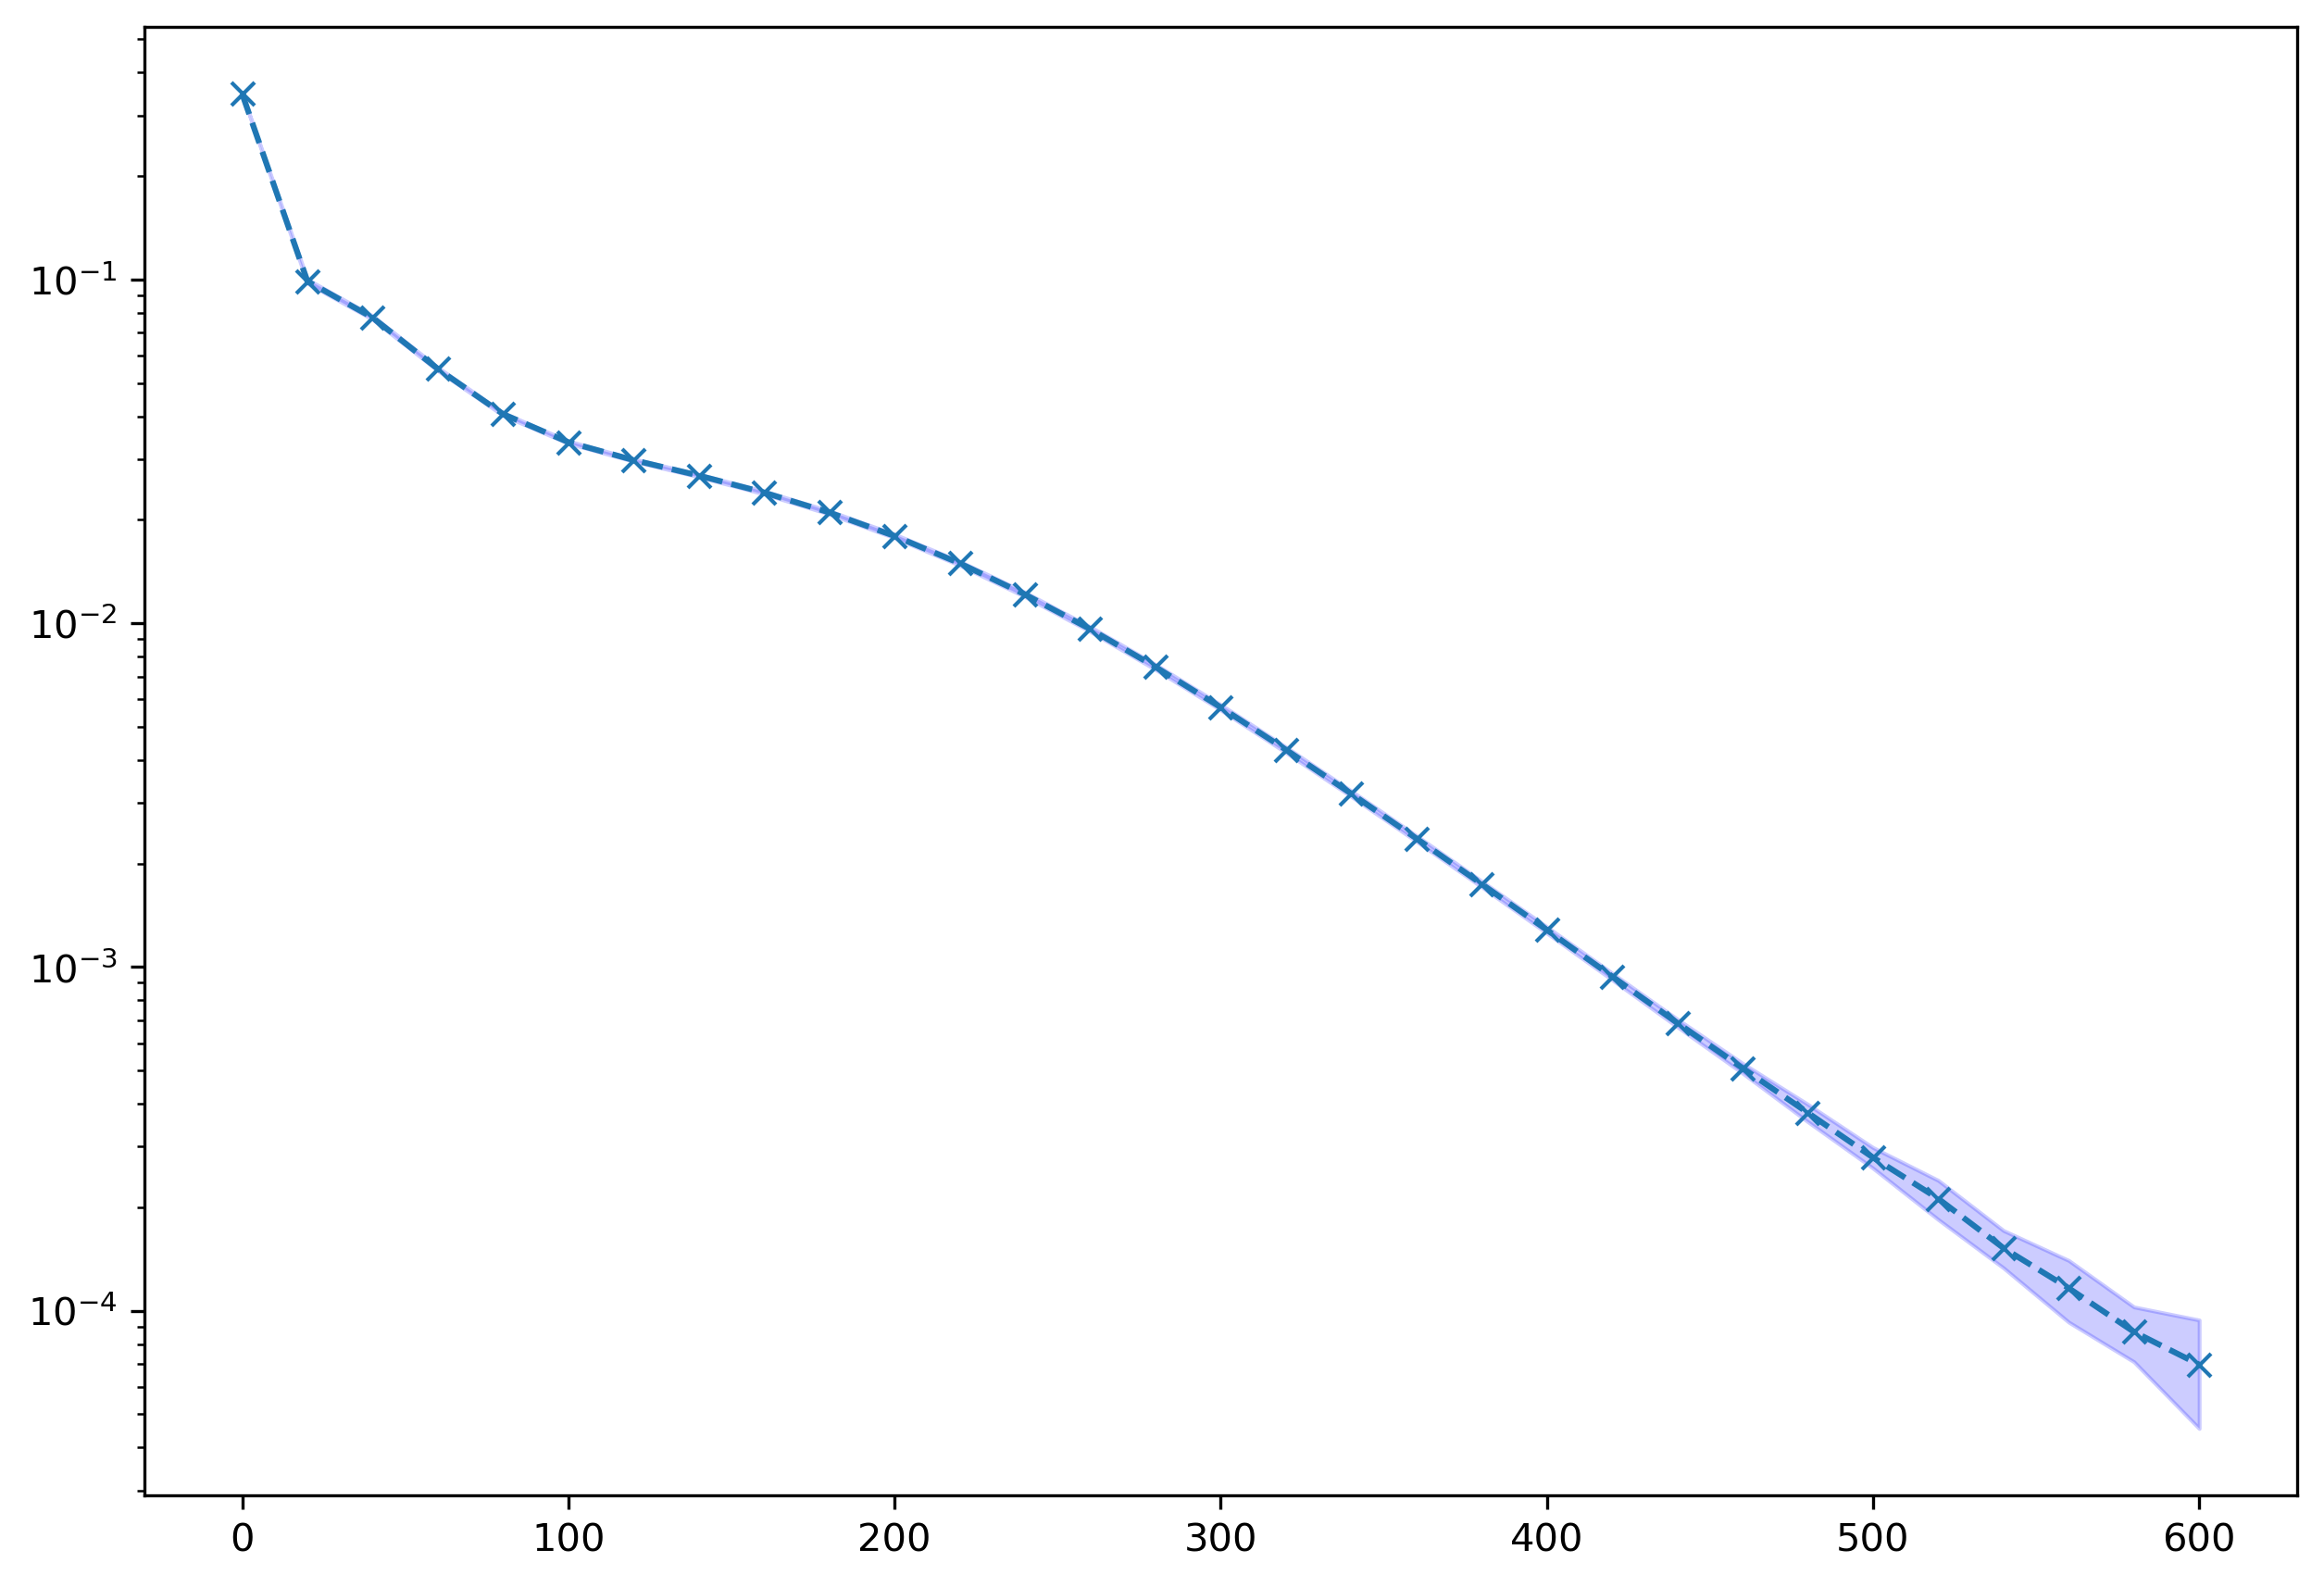

In [26]:
plt.figure(figsize=(10,7), dpi=150)
plt.plot(n_eig_calls, rmse_mean, '--x')
plt.fill_between(n_eig_calls, rmse_mean-rmse_std, rmse_mean+rmse_std,
                                 color='b', alpha=0.2)
plt.yscale('log')
plt.show()

# 2. H4 Chain -- VQE (Linear Constraints + GD)

In [51]:
def get_summary(n_runs, list_max_iters, list_save_dirs, labels_trends, FLAG_rmse=True):
    n_dirs = len(list_save_dirs)
    
    trend_style = ['--x', '--o', '--s', '--d']
    trend_color = ['b', 'g', 'r', 'm']
    
    plt_fig = plt.figure(figsize=(10,7), dpi=150)
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = "sans-serif"
    plt.rcParams['font.sans-serif'] = "Helvetica"
    plt.rcParams['figure.titlesize'] = 22
    plt.rcParams['axes.labelsize'] = 22
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['legend.fontsize'] = 18
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    
    for ind in range(n_dirs):
        save_dir = list_save_dirs[ind]
        emp_est = qbe.utils.job_processor.EmpiricalEstimator(save_dir, max_iters=list_max_iters[ind])
        print('%d/%d runs succeeded' % (emp_est.job_results['n_runs'], n_runs))
        
        if FLAG_rmse:
            rmse_mean, rmse_std = emp_est.plot_rmse()
        else:
            rmse_mean, rmse_std = emp_est.plot_norm_gradients()
                
        n_eig_calls = emp_est.job_results['neig_calls'][0]
        
        plt.plot(n_eig_calls, rmse_mean, trend_style[ind], c=trend_color[ind], mfc='None',
                 label=labels_trends[ind])
        
        plt.fill_between(n_eig_calls, rmse_mean-rmse_std, rmse_mean+rmse_std,
                                 color=trend_color[ind], alpha=0.2)
    plt.yscale('log')
    plt.legend(loc='best')
    plt.xlabel('Number of eigensolver calls')
    
    if FLAG_rmse:
        plt.ylabel('Density Mismatch')
    else:
        plt.ylabel('Norm of Gradient')
        
    plt.show()

In [7]:
reload_package(qbe)

In [8]:
n_runs = 120
max_iters = 12

In [20]:
list_save_dir = 'h4_linear_vqe_gd_001/log_runs'

In [10]:
emp_est = qbe.utils.job_processor.EmpiricalEstimator(list_save_dir, max_iters=max_iters)

In [11]:
emp_est.job_results['n_runs']

51

In [12]:
rmse_mean, rmse_std = emp_est.plot_rmse()
norm_grad_mean, norm_grad_std = emp_est.plot_norm_gradients()

In [13]:
n_eig_calls = emp_est.job_results['neig_calls'][0]

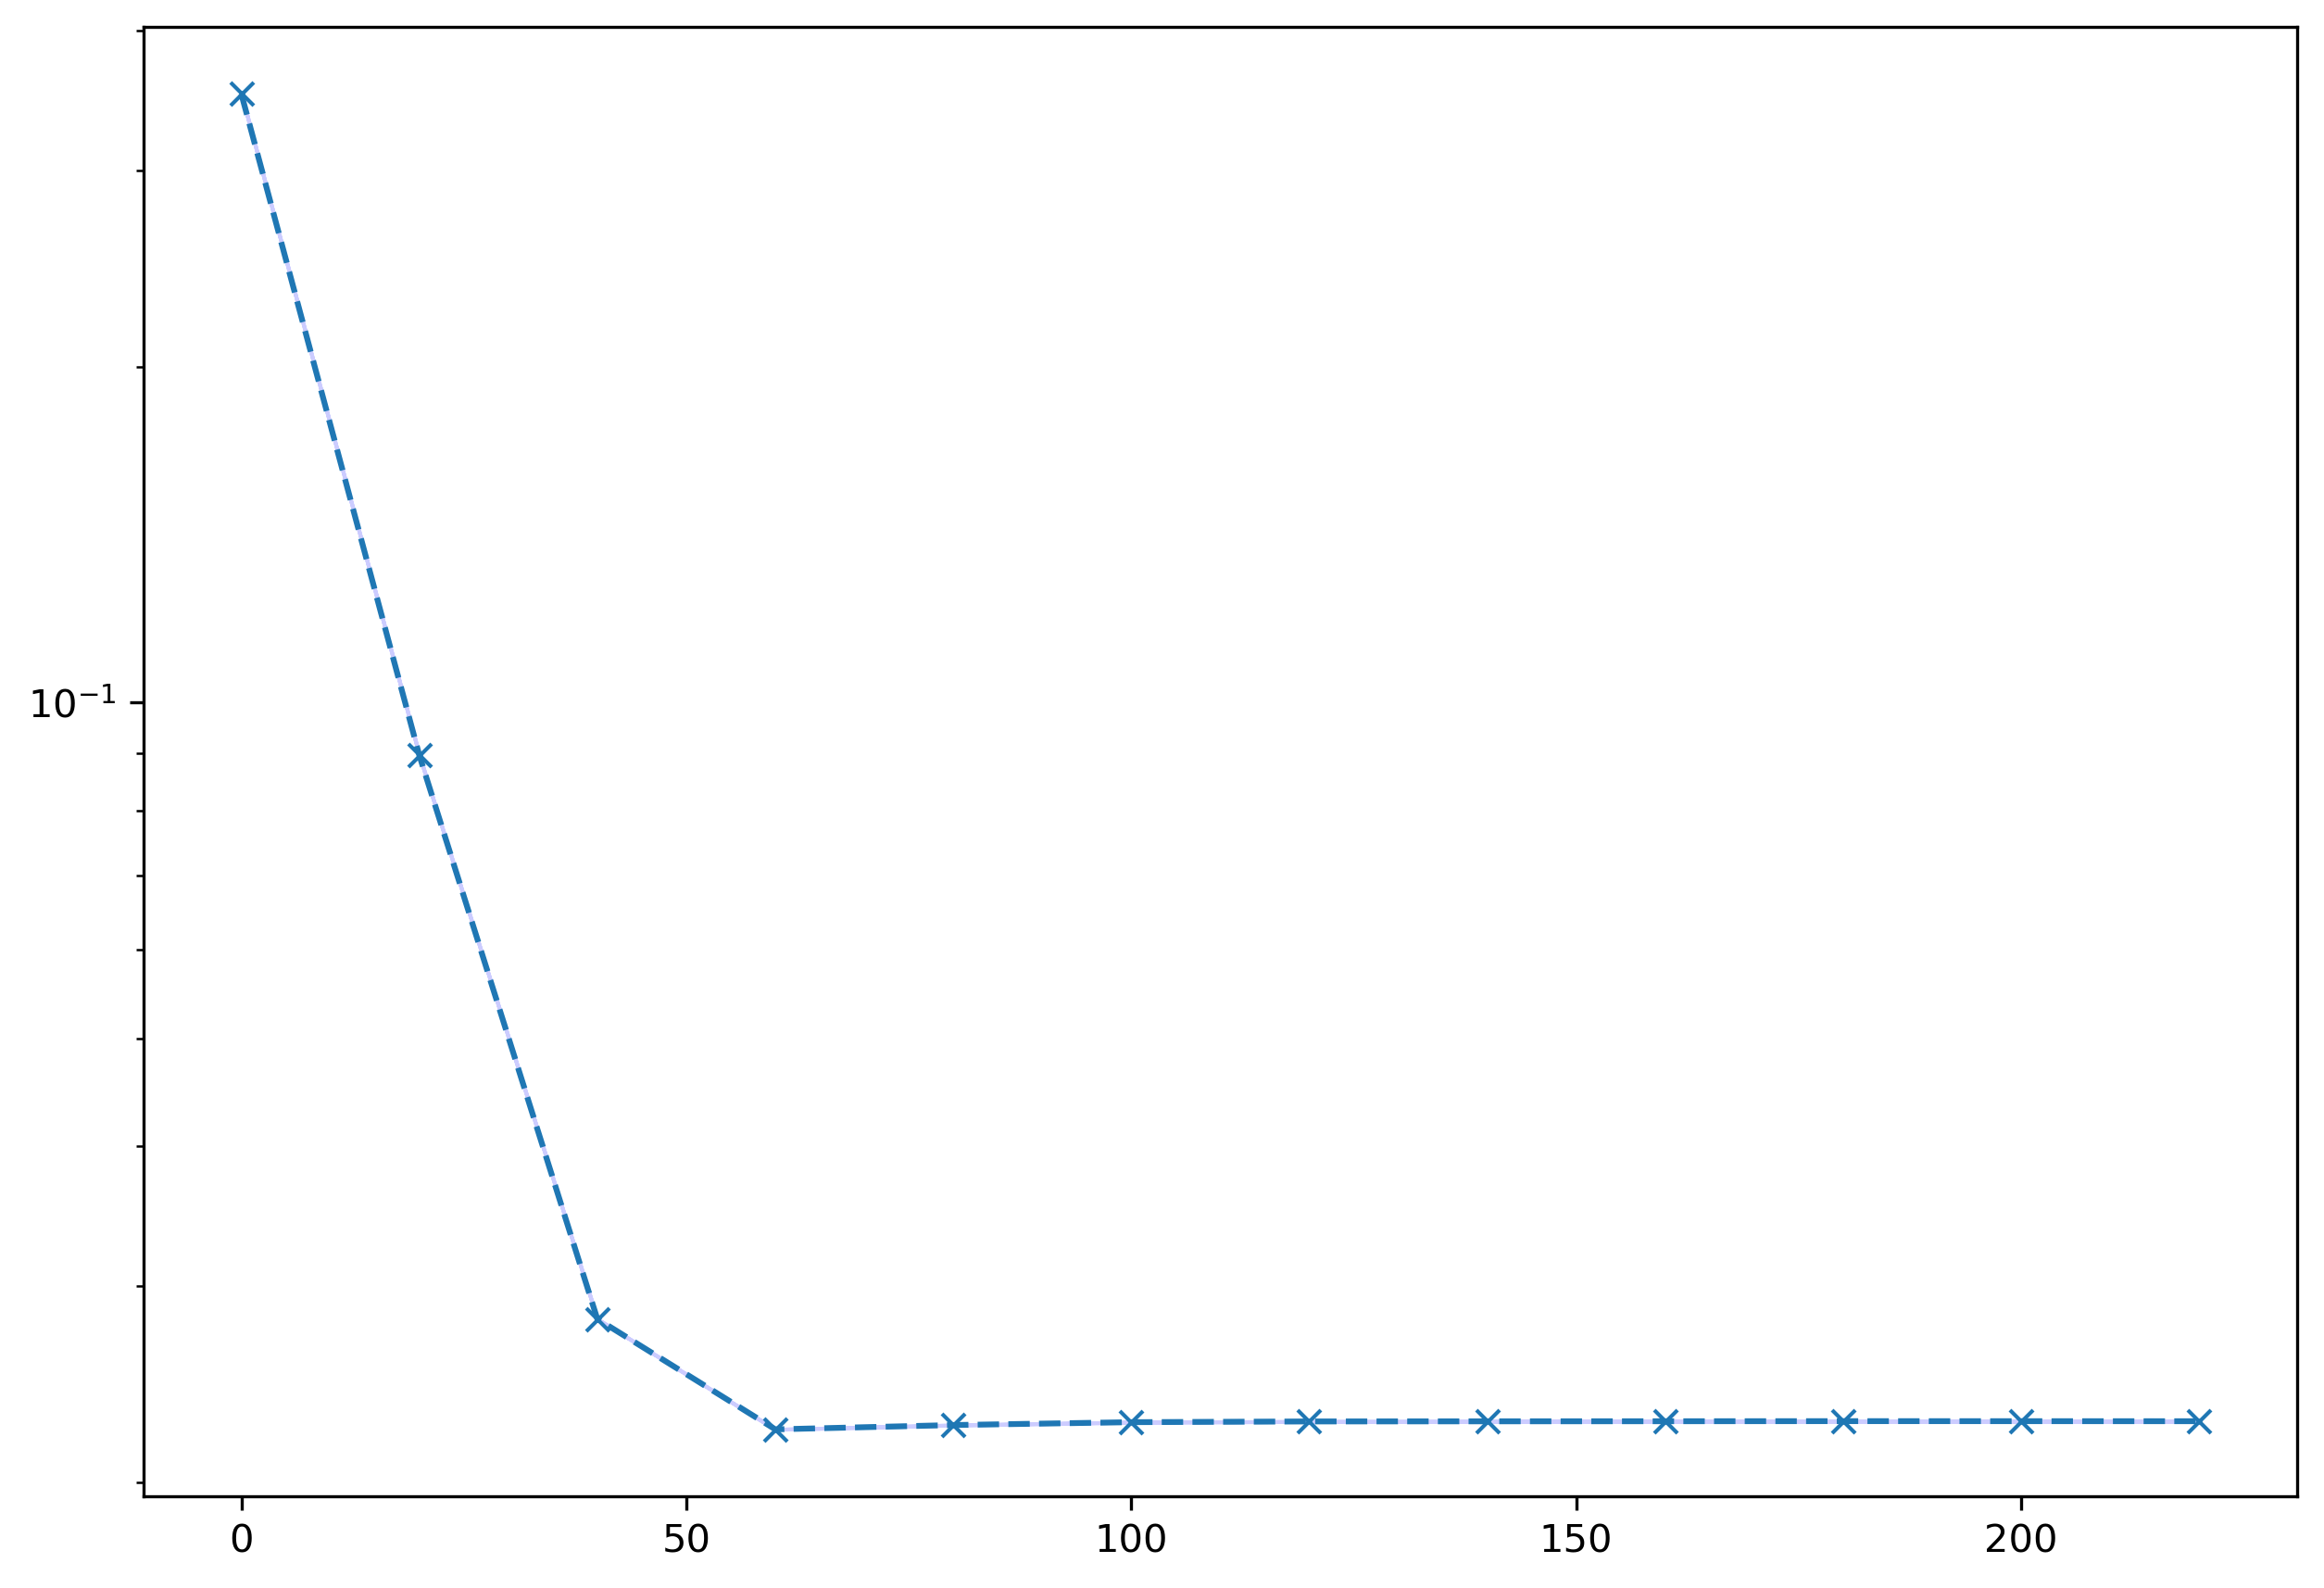

In [16]:
plt.figure(figsize=(10,7), dpi=150)
plt.plot(n_eig_calls, rmse_mean, '--x')
plt.fill_between(n_eig_calls, rmse_mean-rmse_std, rmse_mean+rmse_std,
                                 color='b', alpha=0.2)
plt.yscale('log')
plt.show()

In [17]:
rmse_mean

array([0.35113448, 0.08964241, 0.02800556, 0.02229743, 0.02249652,
       0.02263016, 0.02266398, 0.02266979, 0.02267379, 0.02267878,
       0.02267704, 0.02267509])

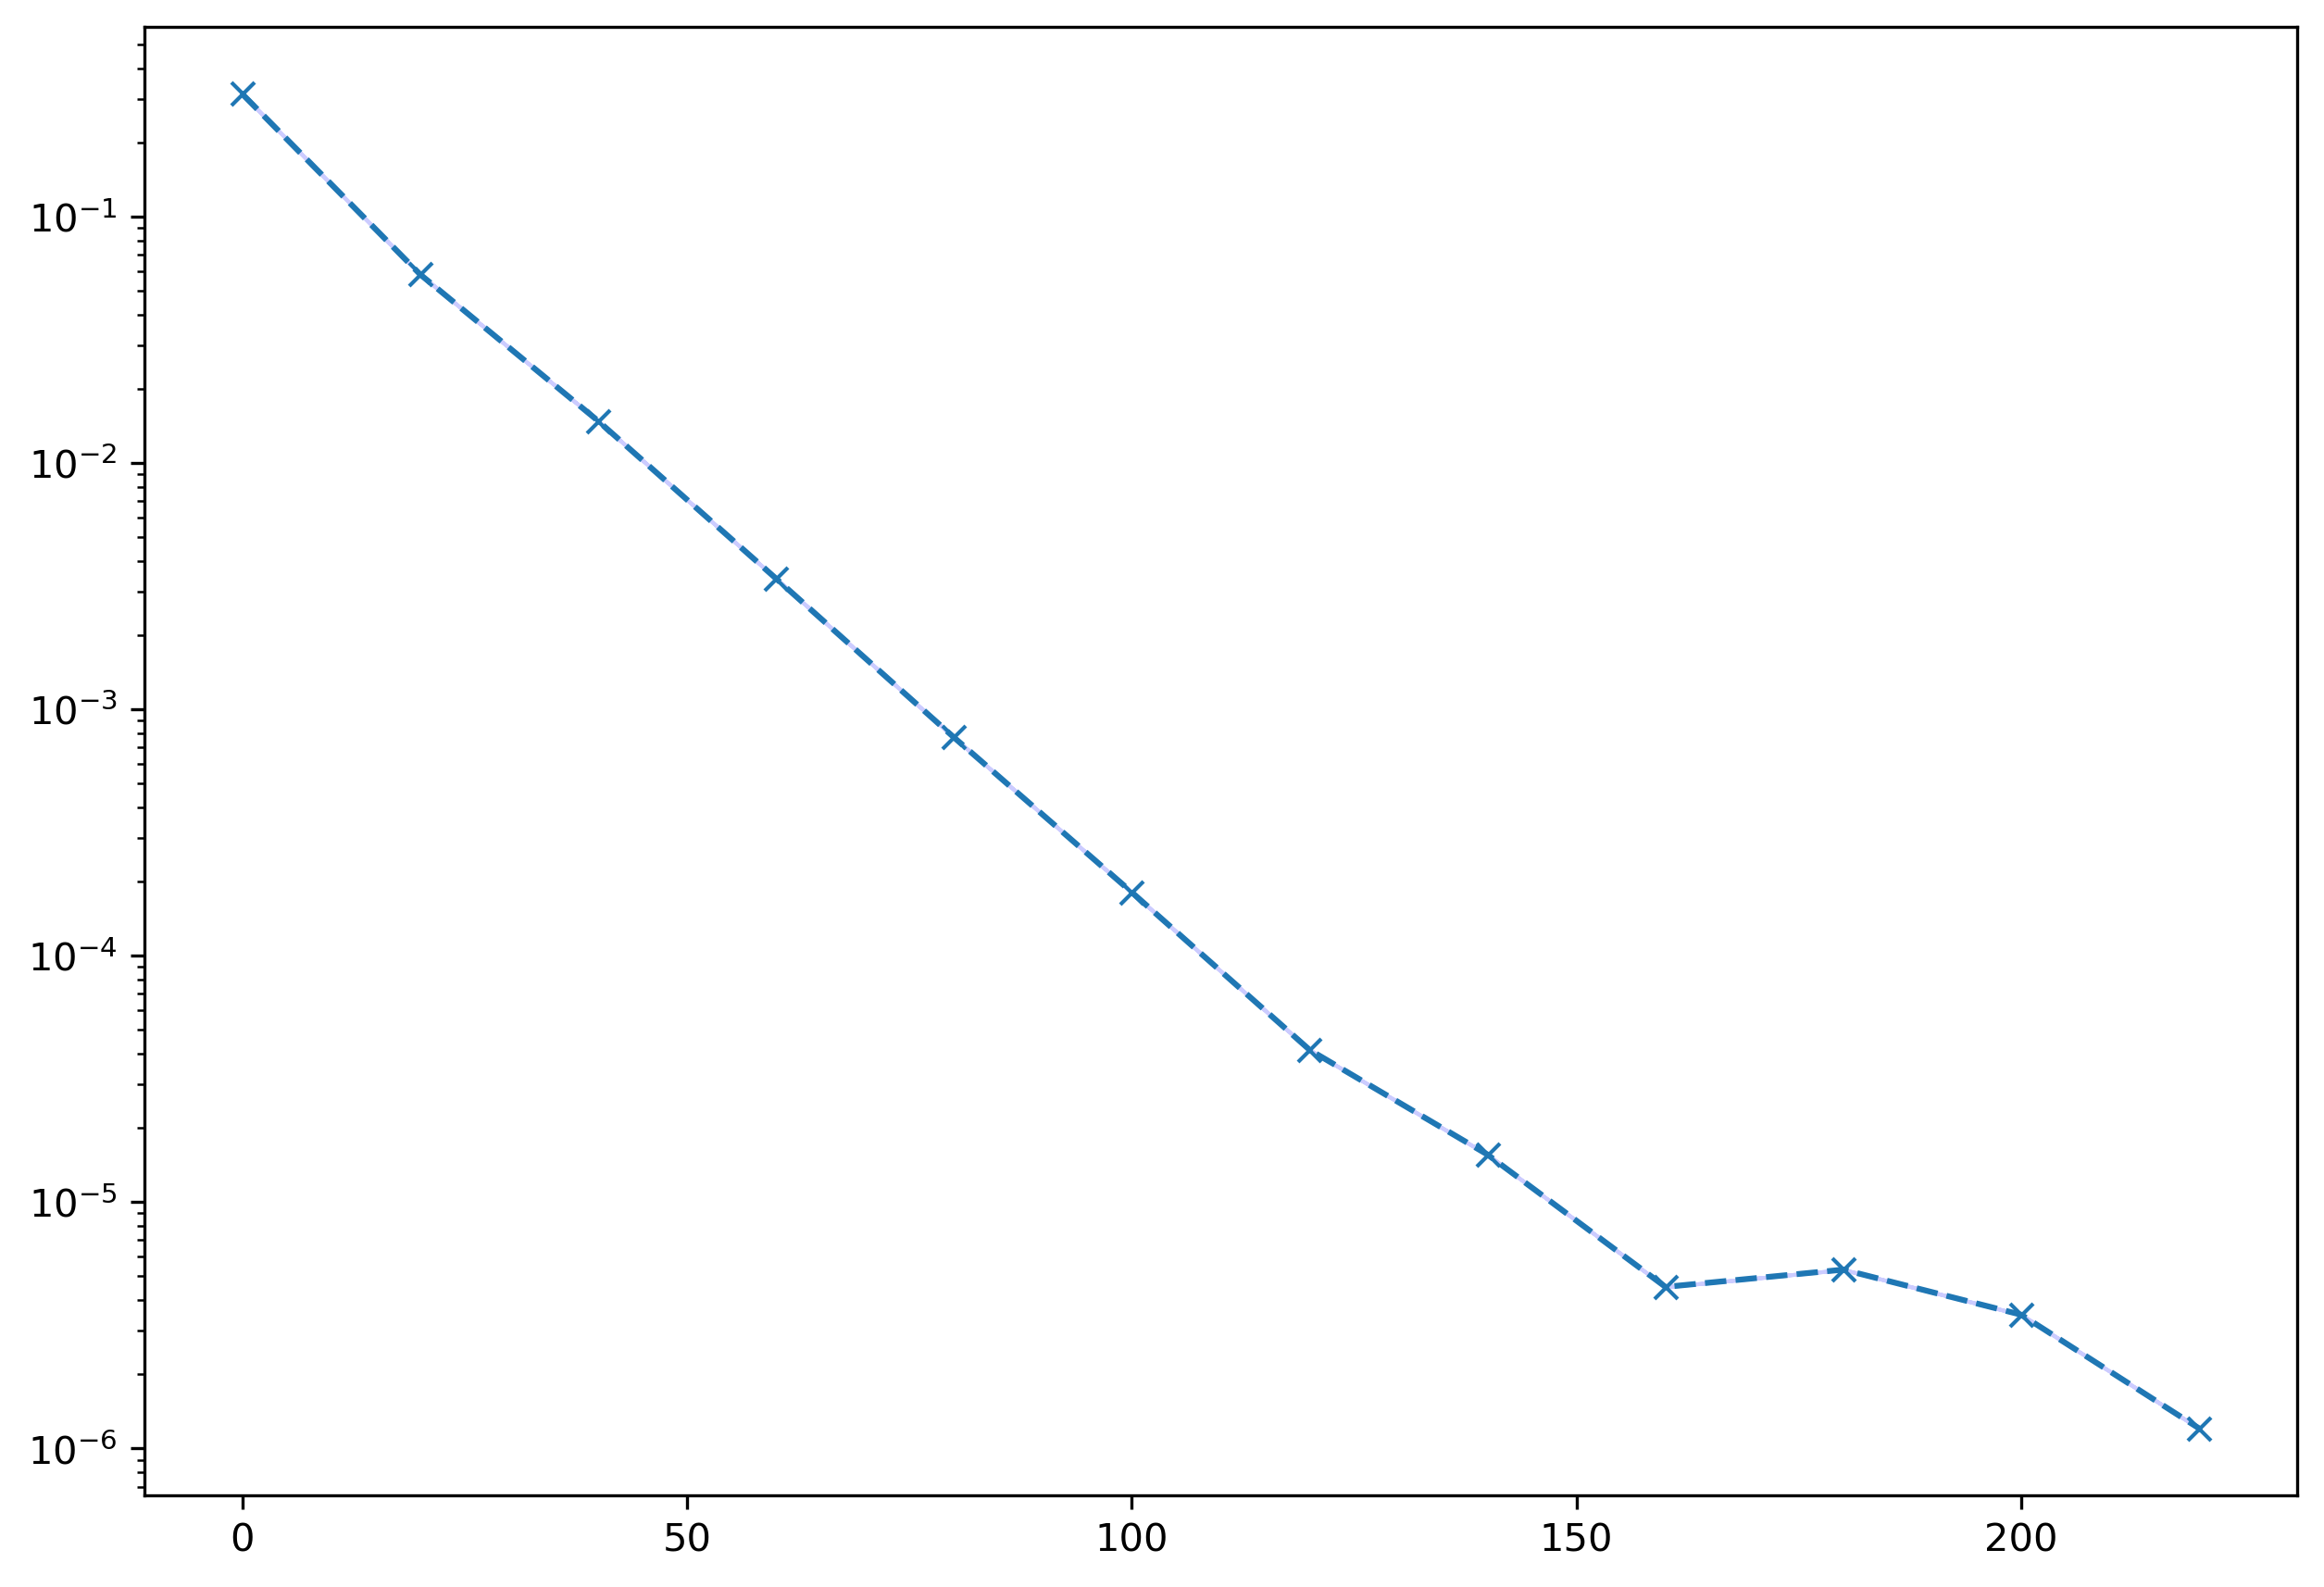

In [18]:
plt.figure(figsize=(10,7), dpi=150)
plt.plot(n_eig_calls, norm_grad_mean, '--x')
plt.fill_between(n_eig_calls, norm_grad_mean - norm_grad_std, norm_grad_mean+norm_grad_std,
                                 color='b', alpha=0.2)
plt.yscale('log')
plt.show()

## Plot multiple trends

In [52]:
list_save_dirs = ['h4_linear_vqe_gd_001/log_runs', 'h4_linear_vqe_gd_002/log_runs',
                 'h4_linear_vqe_no_LO2MO_gd_002/log_runs']

list_max_iters = [20, 12, 10]
labels_trends = ['1e4 shots + LO2MO', '1e5 shots + LO2MO', '1e5 shots, No LO2MO']
n_runs = 120

120/120 runs succeeded
120/120 runs succeeded
120/120 runs succeeded


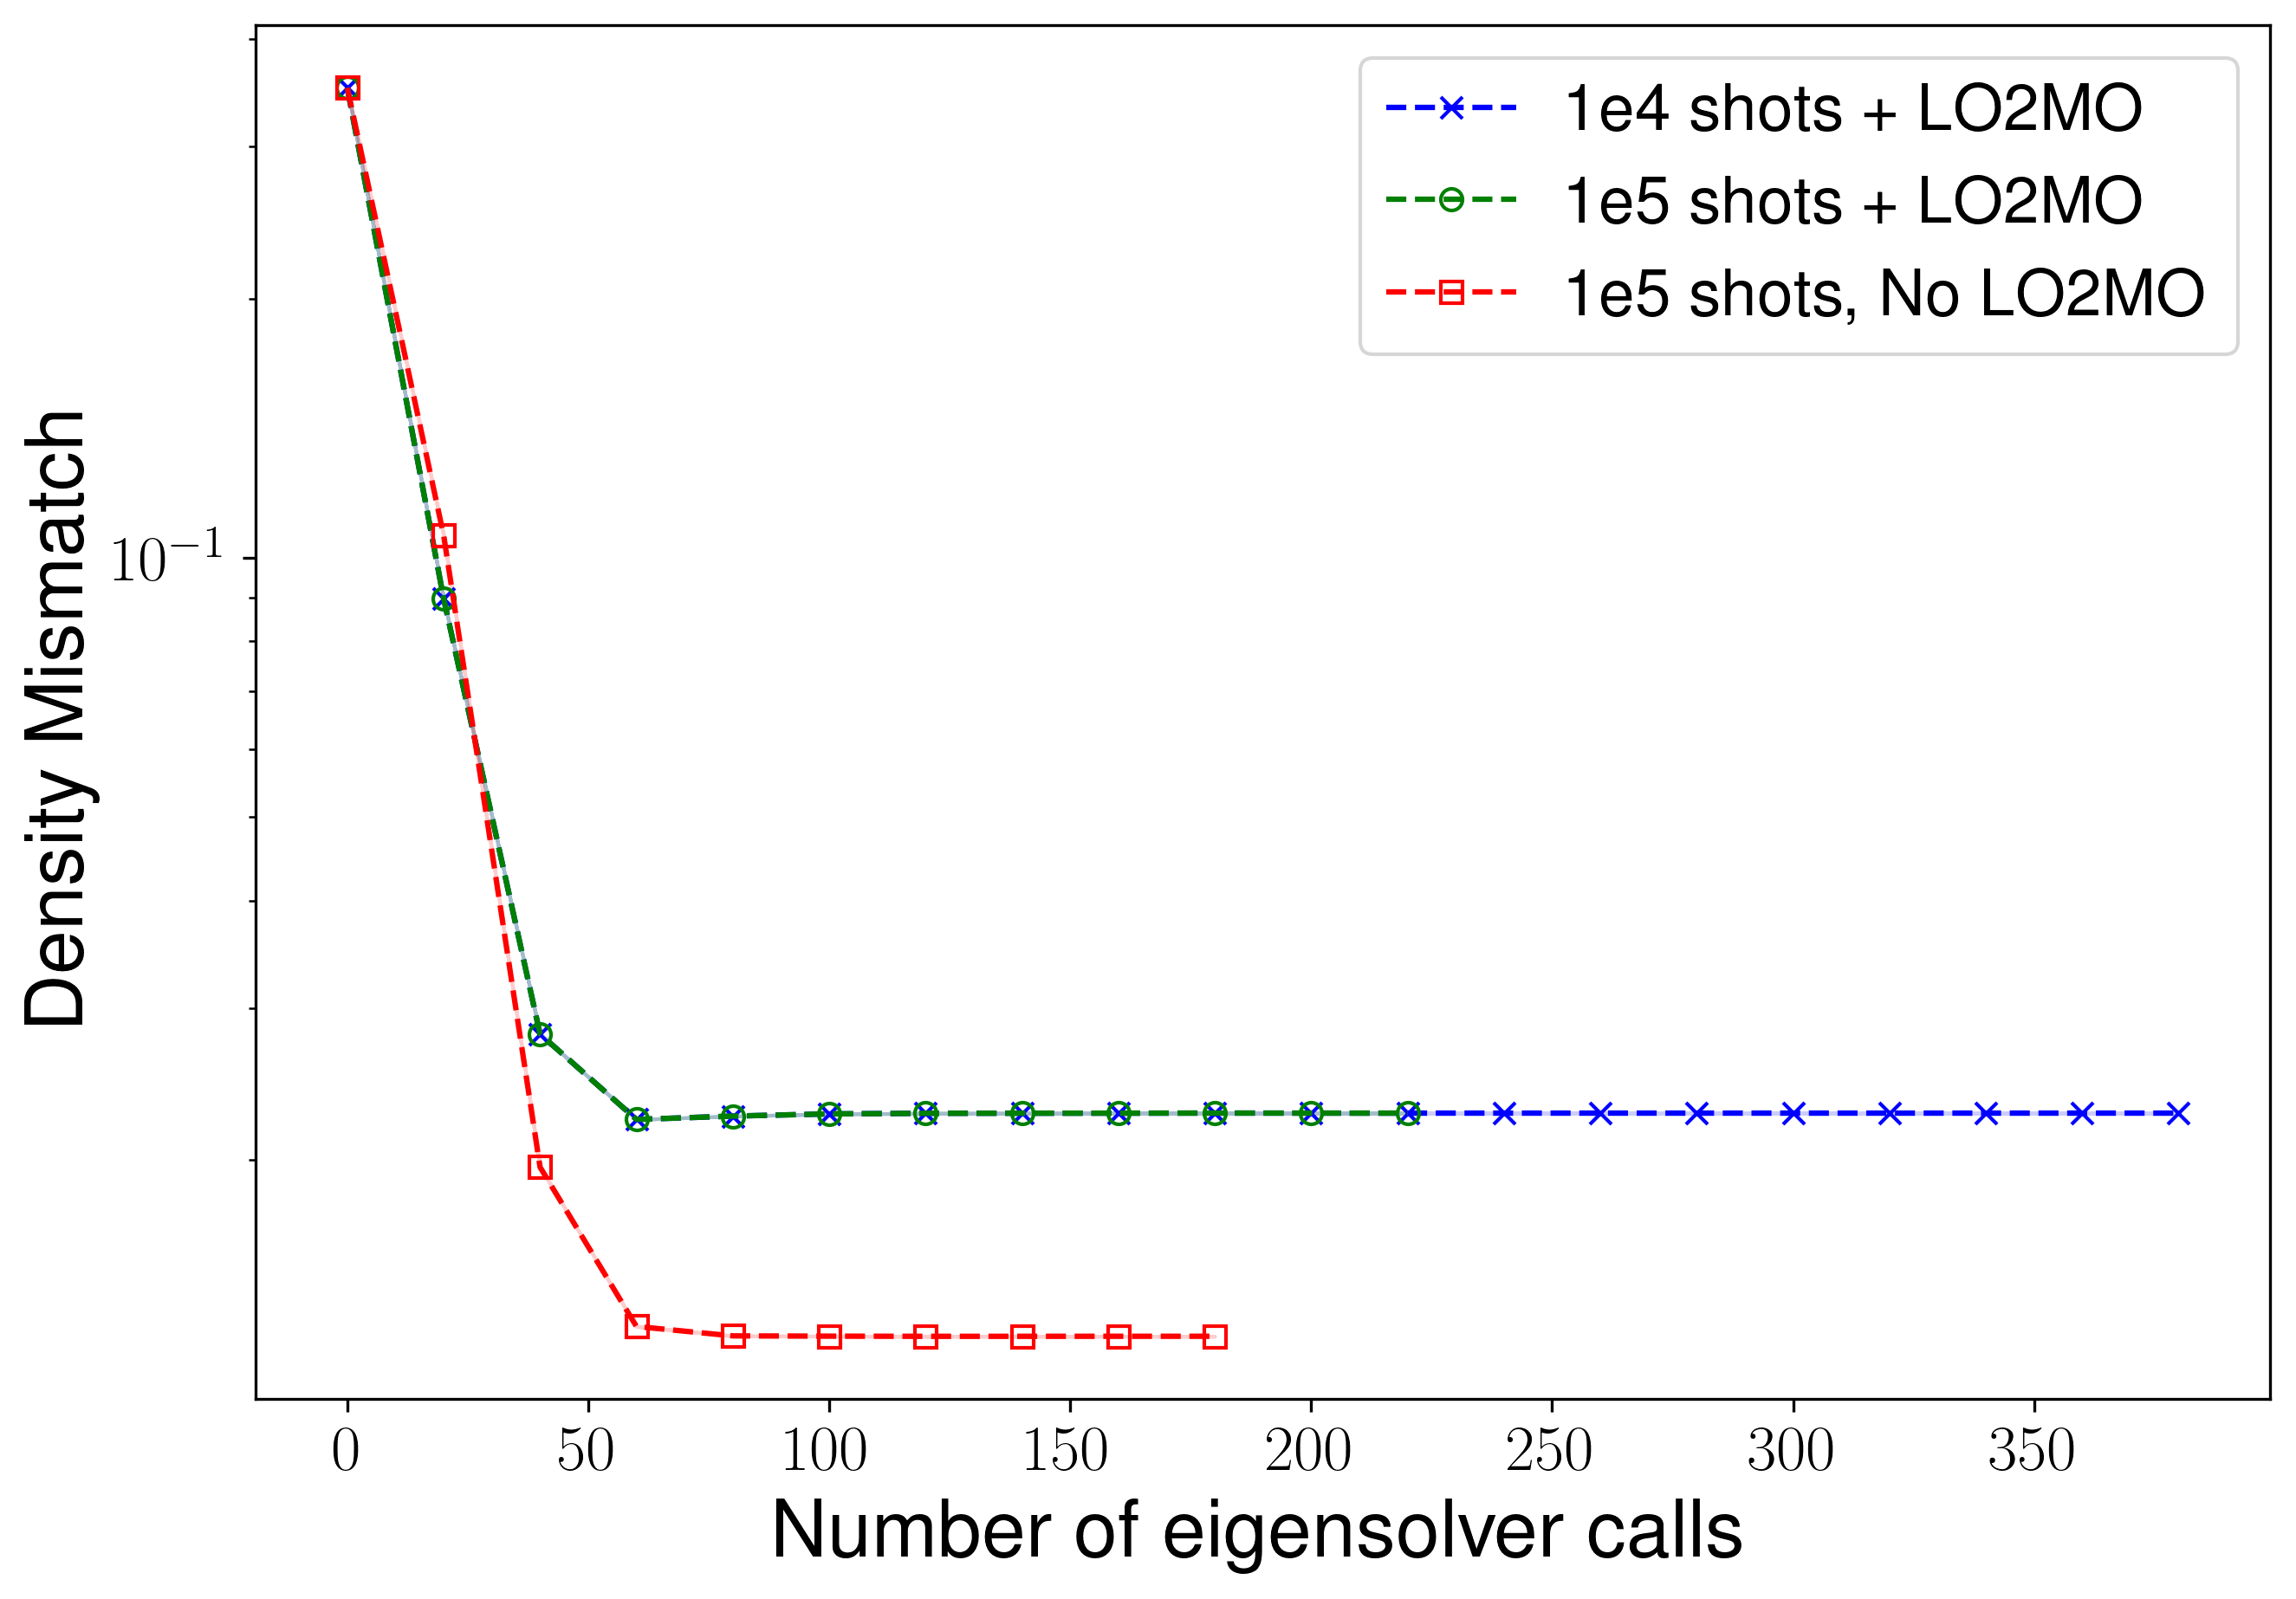

In [53]:
get_summary(n_runs, list_max_iters, list_save_dirs, labels_trends)

120/120 runs succeeded
120/120 runs succeeded
120/120 runs succeeded


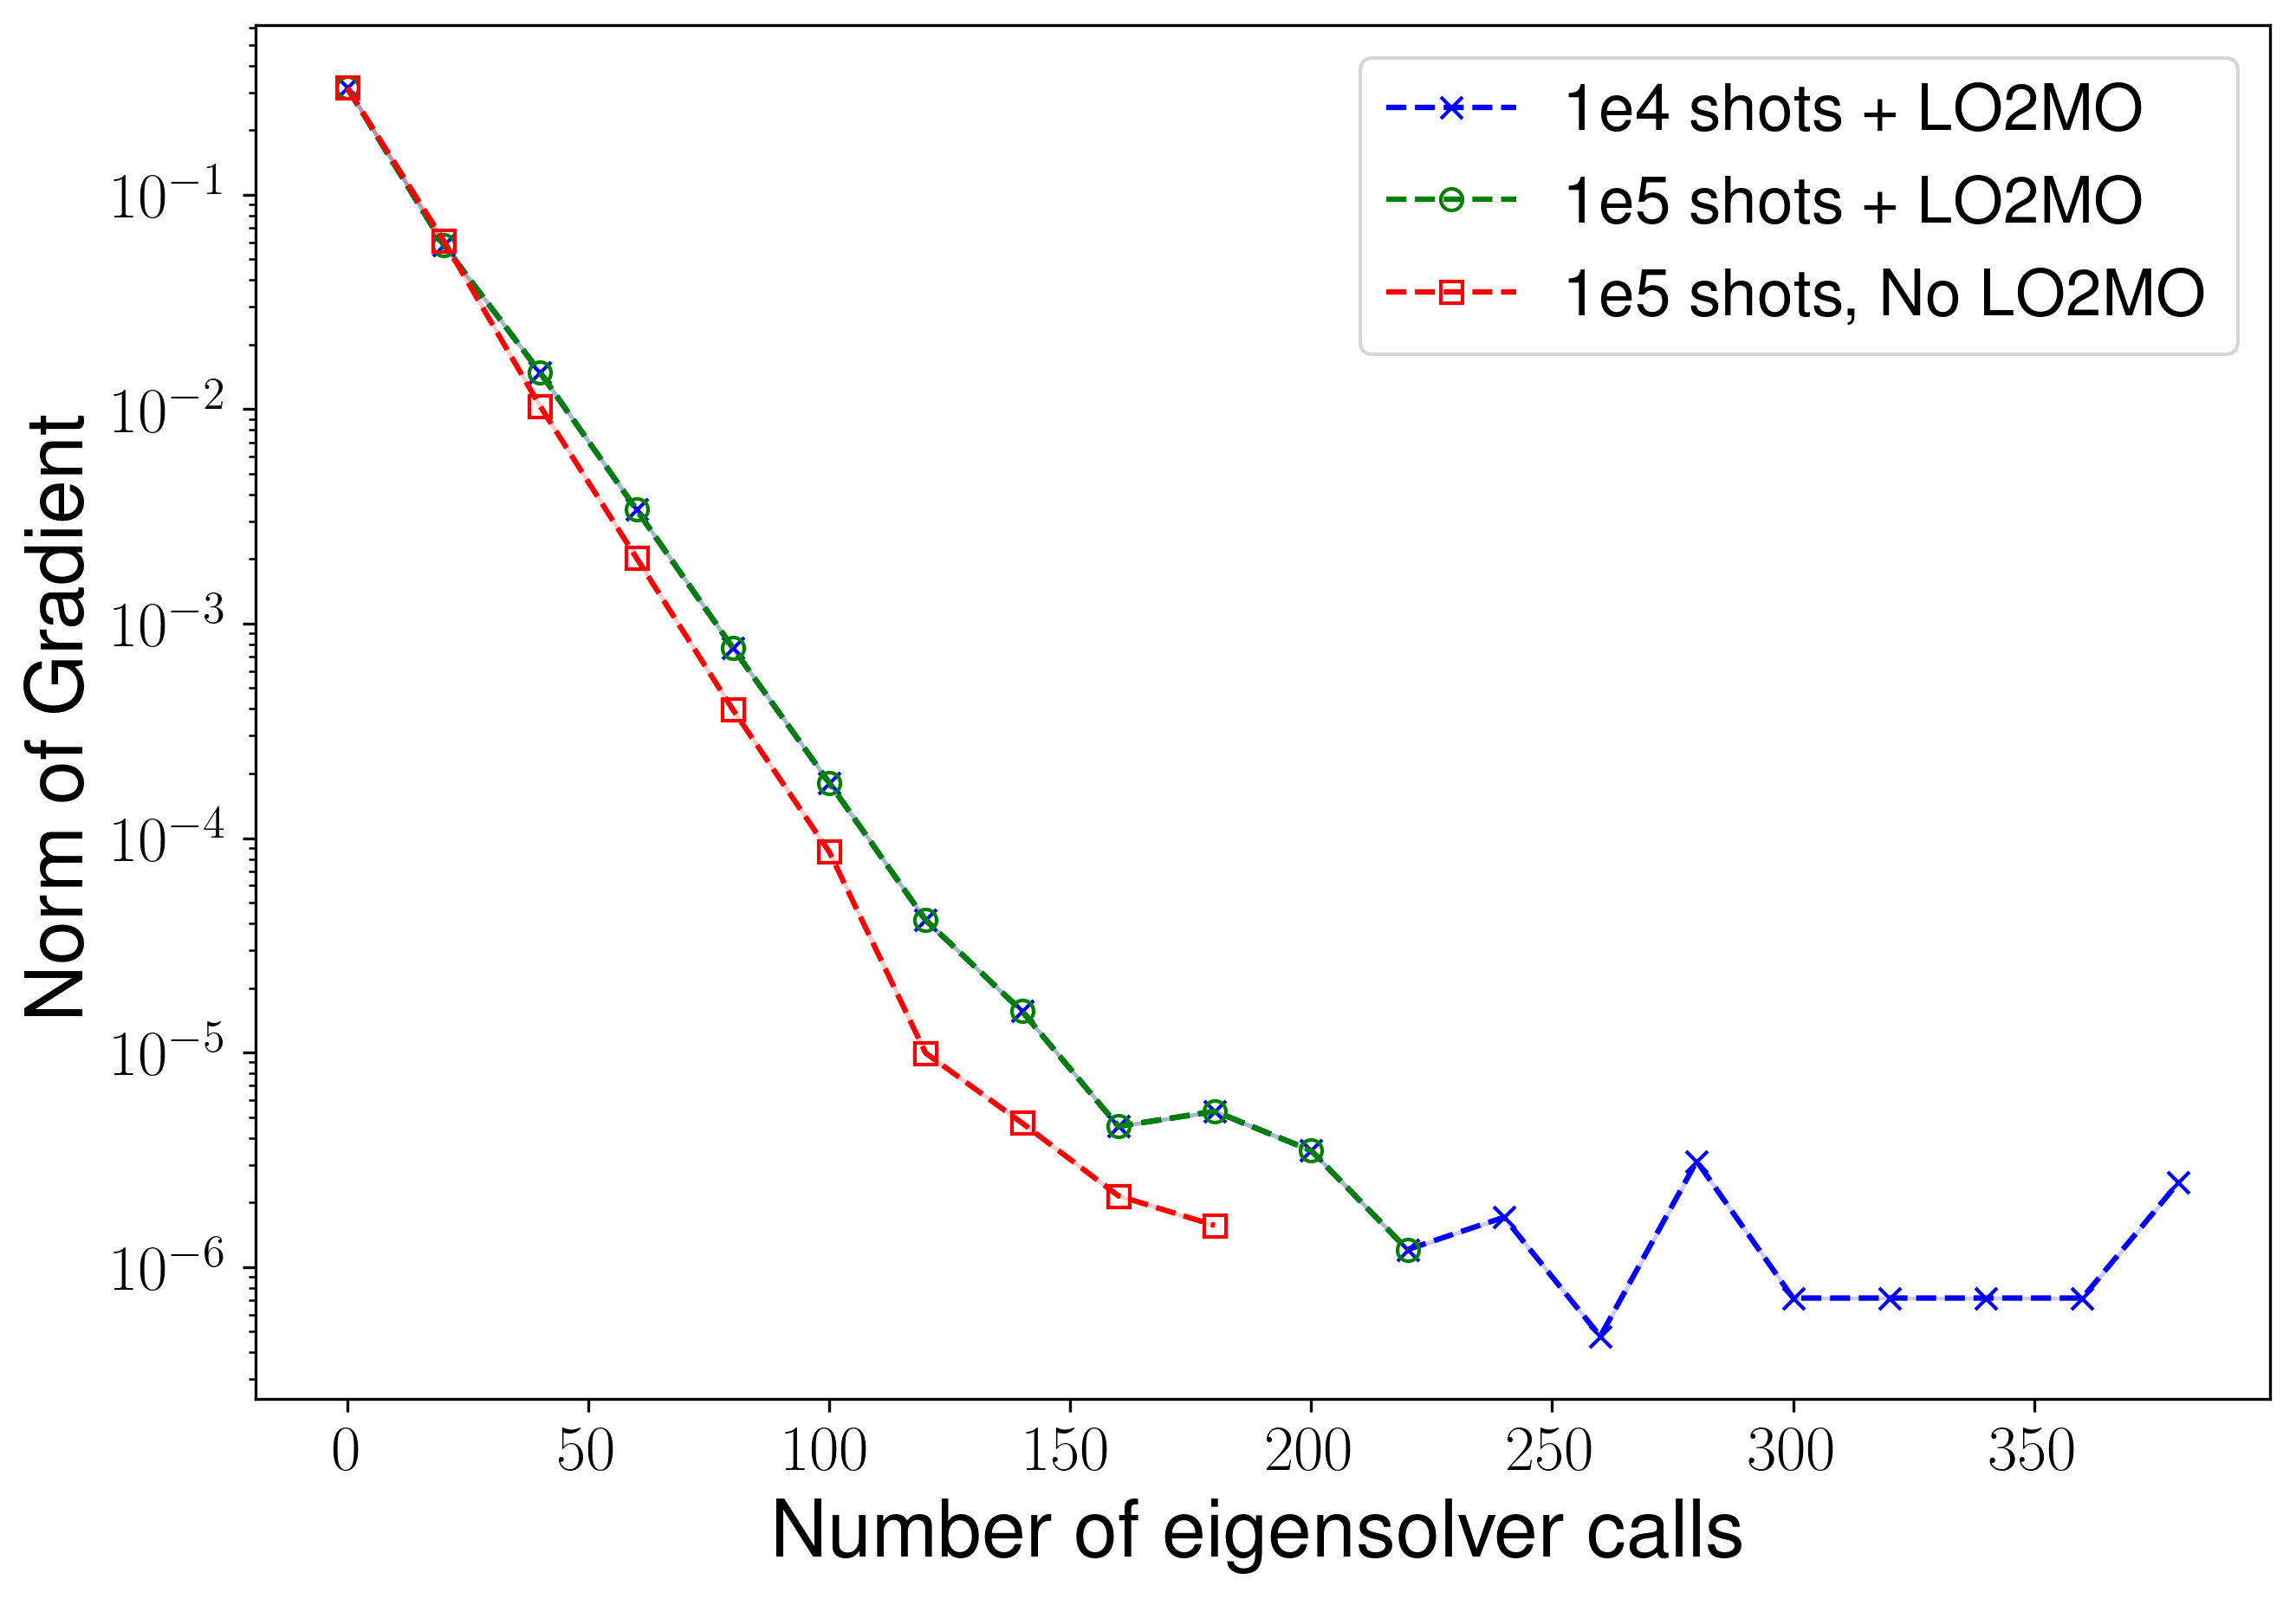

In [54]:
get_summary(n_runs, list_max_iters, list_save_dirs, labels_trends, FLAG_rmse=False)